In [2]:
# Import Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
# Load Dataset from Datasets Folder 
students = pd.read_csv("../Datasets/student_performance.csv")

## **Basic EDA**

In [4]:
# Preview of dataset  
students.head(5)

,StudyHours,Attendance,Resources,Extracurricular,Motivation,Internet,Gender,Age,LearningStyle,OnlineCourses,Discussions,AssignmentCompletion,ExamScore,EduTech,StressLevel,FinalGrade
0,19,64,1,0,0,1,0,19,2,8,1,59,40,0,1,3
1,19,64,1,0,0,1,0,23,3,16,0,90,66,0,1,2
2,19,64,1,0,0,1,0,28,1,19,0,67,99,1,1,0
3,19,64,1,1,0,1,0,19,2,8,1,59,40,0,1,3
4,19,64,1,1,0,1,0,23,3,16,0,90,66,0,1,2


After Previewing It seems that dataset is already encoded (Categorical to Numerical)

In [5]:
# Shape of dataset 
Rows , Cols = students.shape
print(f"The Number of Rows -> {Rows}")
print(f"The Number of Cols -> {Cols}")

The Number of Rows -> 14003
The Number of Cols -> 16


In [6]:
# Check Null Values in the dataset 
students.isnull().sum().sort_values(ascending = False)

StudyHours              0
Attendance              0
Resources               0
Extracurricular         0
Motivation              0
Internet                0
Gender                  0
Age                     0
LearningStyle           0
OnlineCourses           0
Discussions             0
AssignmentCompletion    0
ExamScore               0
EduTech                 0
StressLevel             0
FinalGrade              0
dtype: int64

There is no null values in the dataset that's mean the dataset is already imputed or perfectly data collected which is not happened in some of cases 

In [7]:
# Check Duplicates in the dataset 
students.duplicated().sum()

1534

There is **1534** duplicated values in the dataset and we remove this from the dataset 

In [9]:
# Remove Duplicates from dataset 
students.drop_duplicates( inplace= True)

In [10]:
# Verify that the duplicates are dropped or not 
students.duplicated().sum()

0

Now there is no duplicated and Null values in the data 

In [11]:
# Extract some other information from dataset 
students.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12469 entries, 0 to 14002
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   StudyHours            12469 non-null  int64
 1   Attendance            12469 non-null  int64
 2   Resources             12469 non-null  int64
 3   Extracurricular       12469 non-null  int64
 4   Motivation            12469 non-null  int64
 5   Internet              12469 non-null  int64
 6   Gender                12469 non-null  int64
 7   Age                   12469 non-null  int64
 8   LearningStyle         12469 non-null  int64
 9   OnlineCourses         12469 non-null  int64
 10  Discussions           12469 non-null  int64
 11  AssignmentCompletion  12469 non-null  int64
 12  ExamScore             12469 non-null  int64
 13  EduTech               12469 non-null  int64
 14  StressLevel           12469 non-null  int64
 15  FinalGrade            12469 non-null  int64
dtypes: int64(

In [12]:
# Description of dataset 
students.describe()

,StudyHours,Attendance,Resources,Extracurricular,Motivation,Internet,Gender,Age,LearningStyle,OnlineCourses,Discussions,AssignmentCompletion,ExamScore,EduTech,StressLevel,FinalGrade
count,12469.000000,12469.000000,12469.000000,12469.000000,12469.000000,12469.000000,12469.000000,12469.000000,12469.000000,12469.000000,12469.000000,12469.000000,12469.000000,12469.000000,12469.000000,12469.000000
mean,20.034405,80.239233,1.101371,0.583126,0.907370,0.917074,0.538616,23.529152,1.515358,9.872404,0.606223,74.515358,70.310691,0.707194,1.305317,1.451359
std,6.049485,11.469028,0.711171,0.493061,0.709599,0.275781,0.498527,3.510956,1.116071,6.114025,0.488606,14.657687,17.696639,0.455068,0.785488,1.122071
min,5.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,50.000000,40.000000,0.000000,0.000000,0.000000
25%,16.000000,70.000000,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,1.000000,5.000000,0.000000,62.000000,55.000000,0.000000,1.000000,0.000000
50%,20.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,24.000000,2.000000,10.000000,1.000000,74.000000,70.000000,1.000000,2.000000,1.000000
75%,24.000000,90.000000,2.000000,1.000000,1.000000,1.000000,1.000000,27.000000,3.000000,15.000000,1.000000,87.000000,86.000000,1.000000,2.000000,2.000000
max,44.000000,100.000000,2.000000,1.000000,2.000000,1.000000,1.000000,29.000000,3.000000,20.000000,1.000000,100.000000,100.000000,1.000000,2.000000,3.000000


There is a difference in range of features so according to my analysis there is a need of Standardization or normalization 

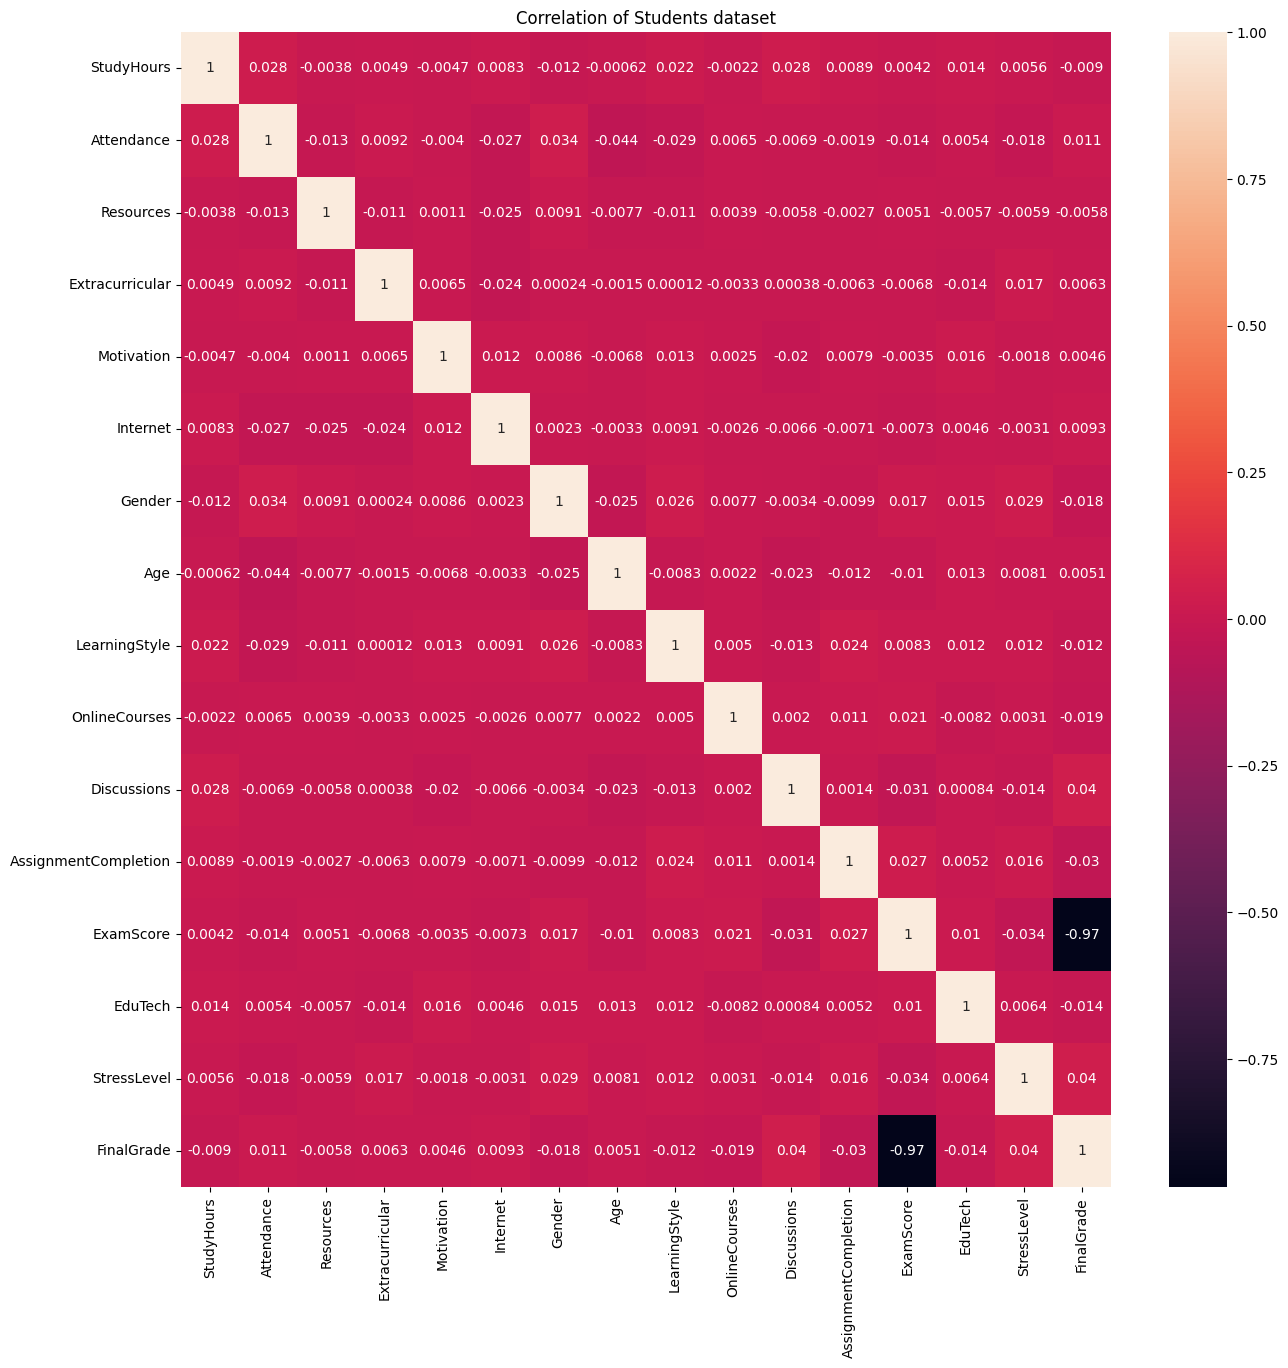

In [16]:
# See the correlation of dataset 
plt.figure(figsize=(15, 15))
sns.heatmap(students.corr() , annot = True)
plt.title("Correlation of Students dataset")
plt.show()

The data features is not correlated with each other heavily instad ExamScore feature which is negitivly impacting FinalGrades

## **Advance EDA**

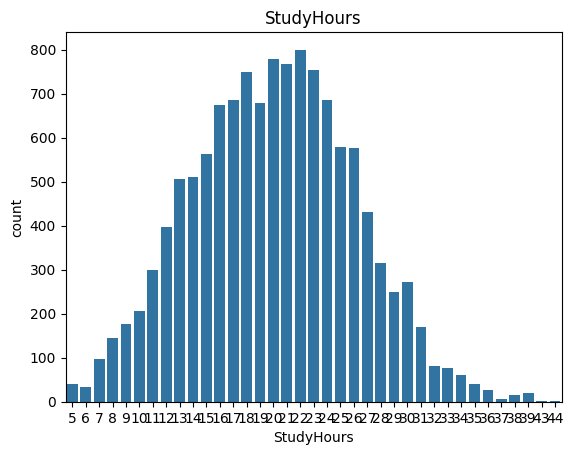

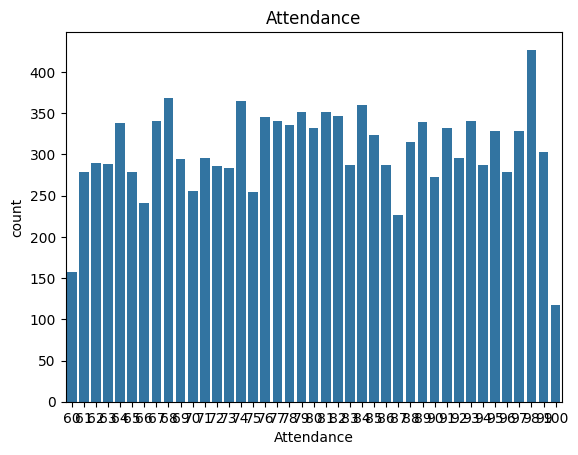

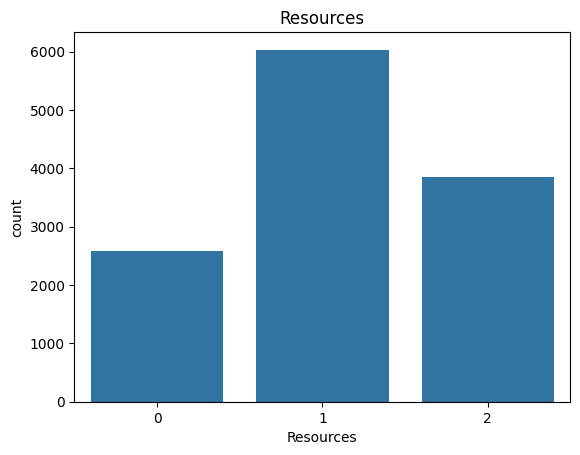

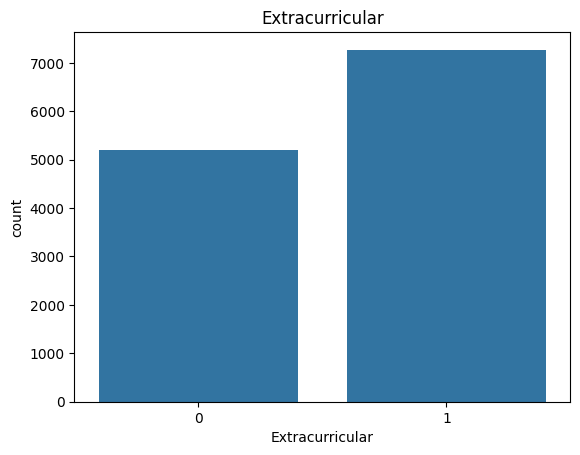

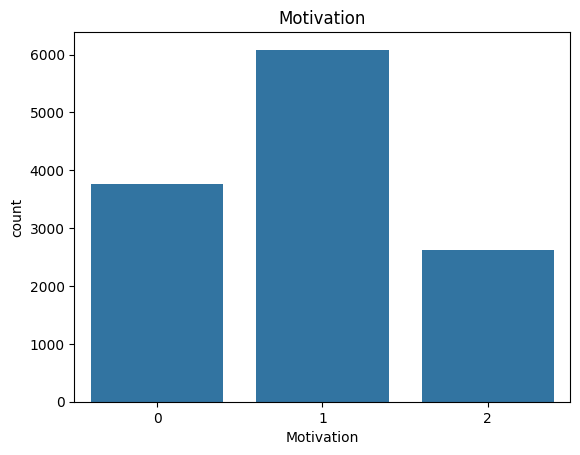

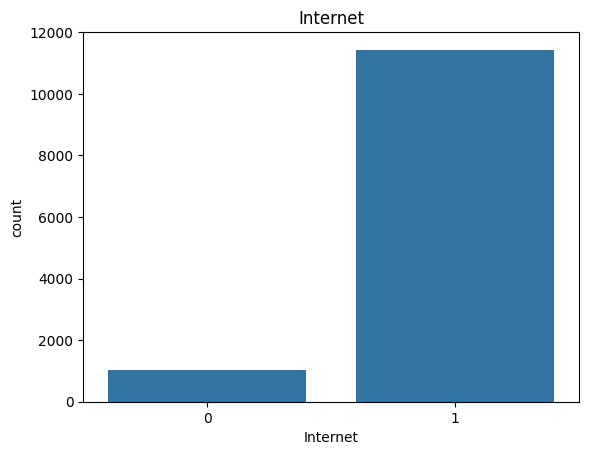

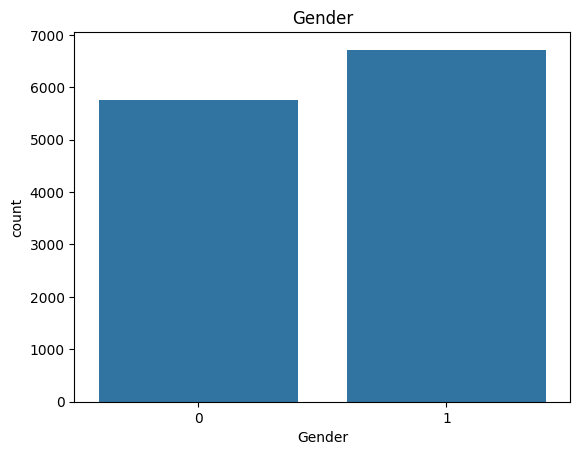

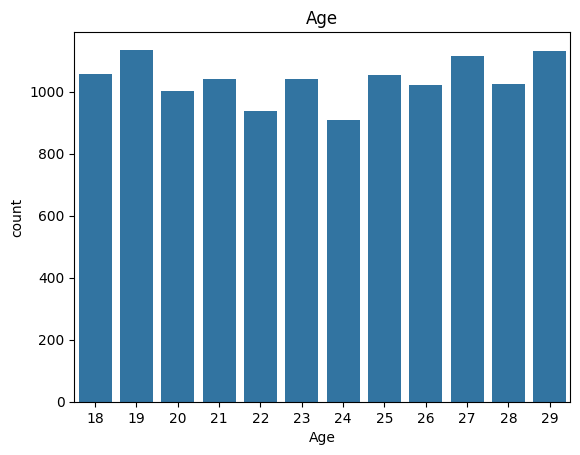

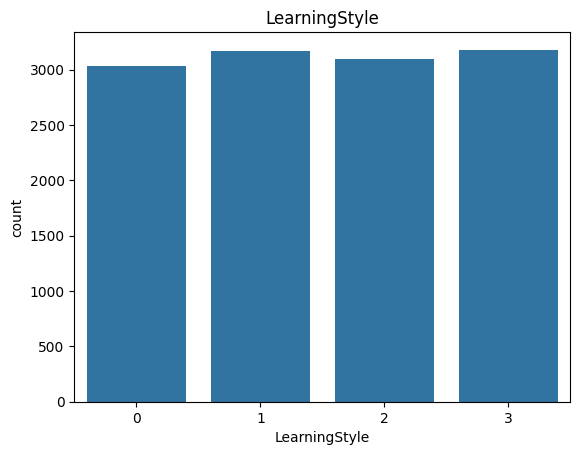

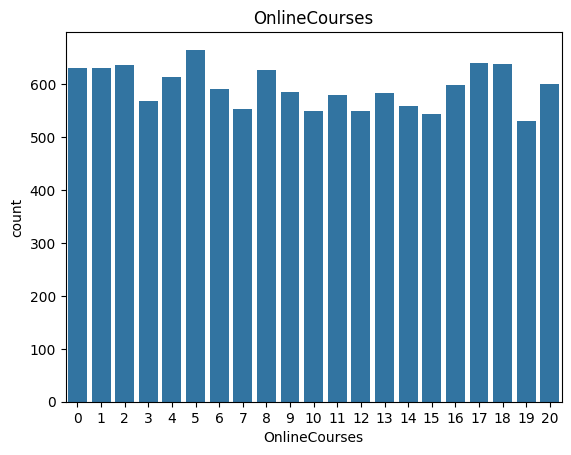

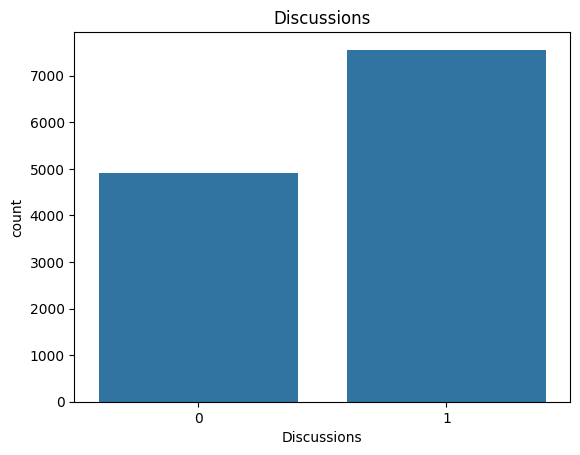

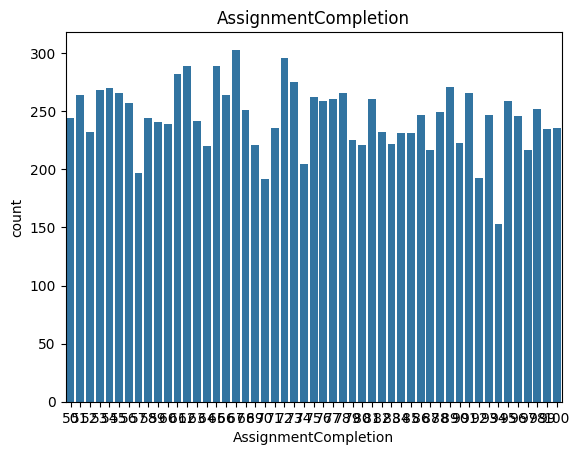

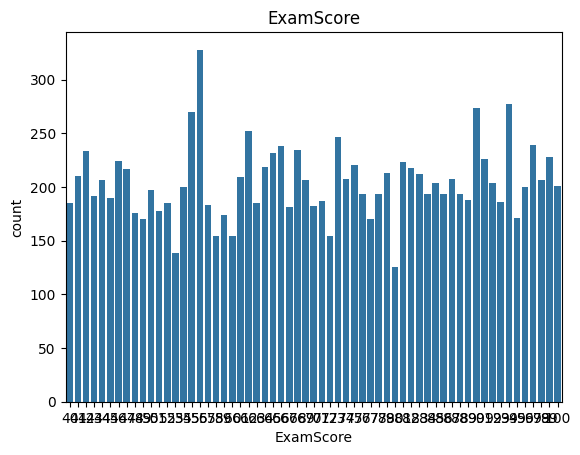

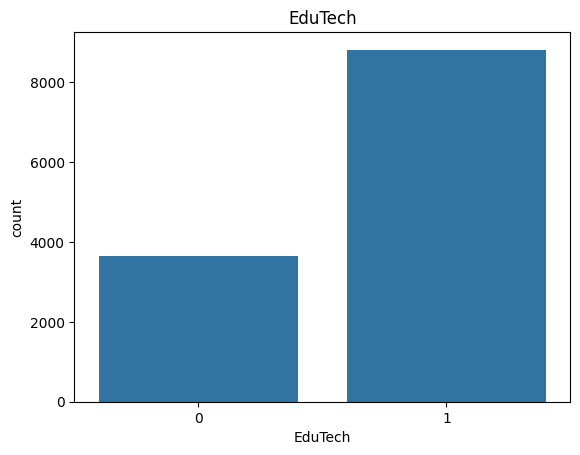

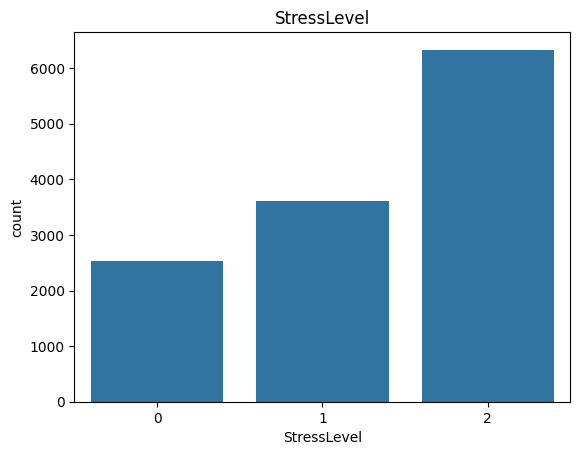

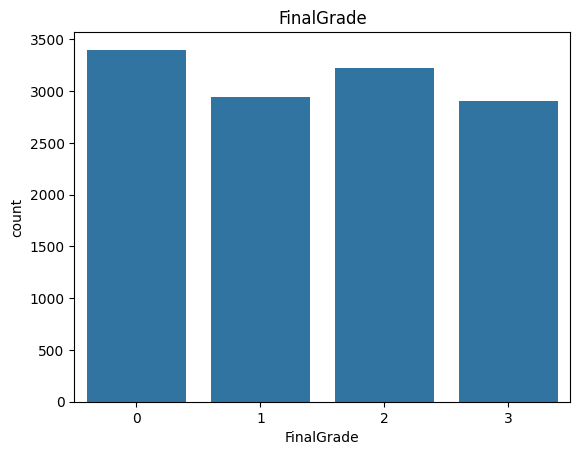

In [17]:
for col in students.columns:
    plt.title(col)
    sns.countplot(data = students , x = col)
    plt.show()

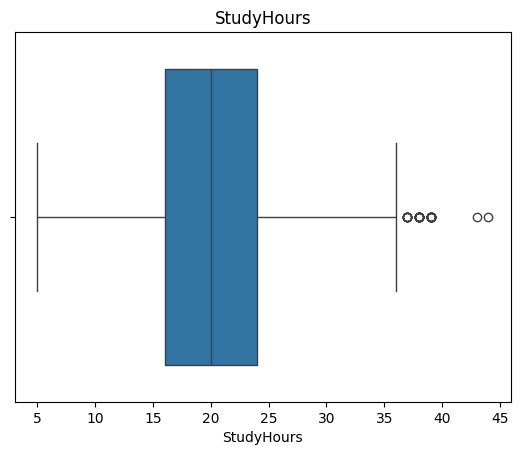

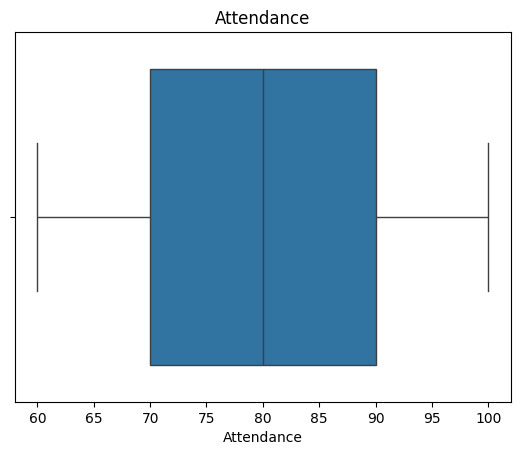

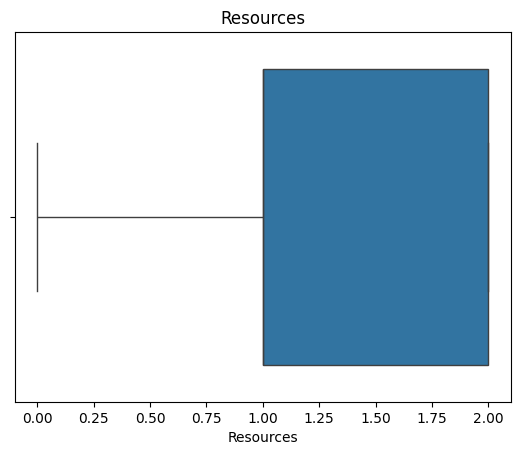

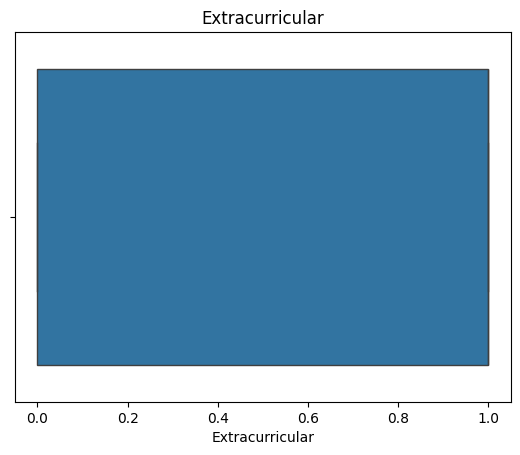

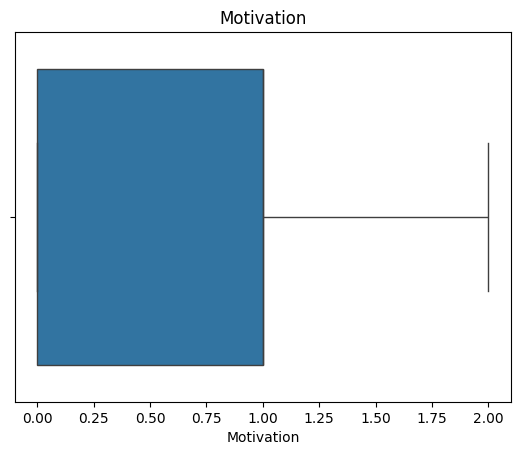

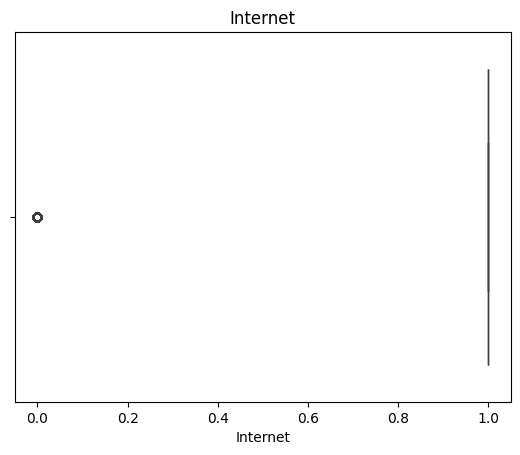

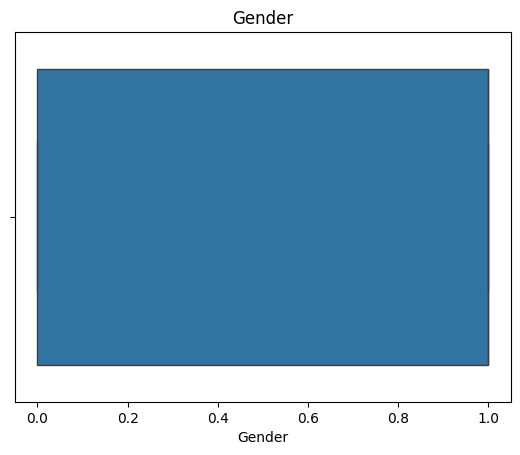

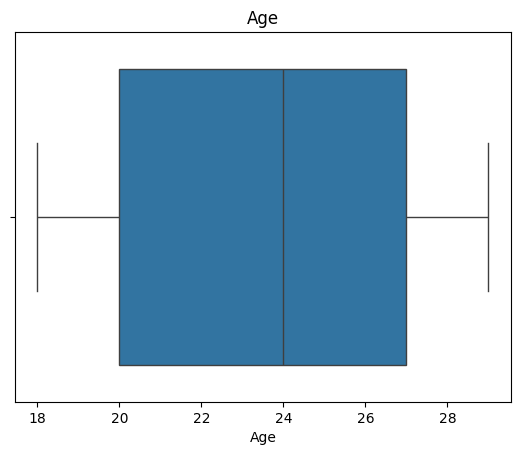

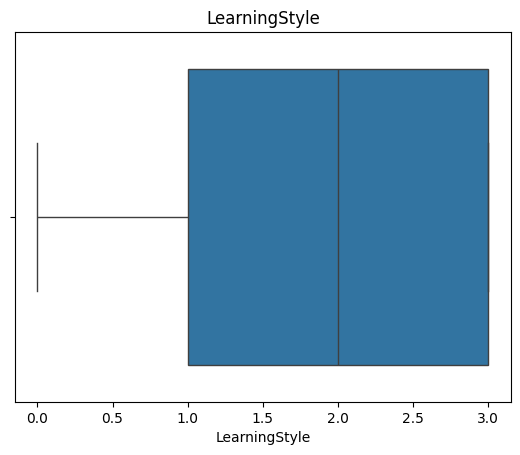

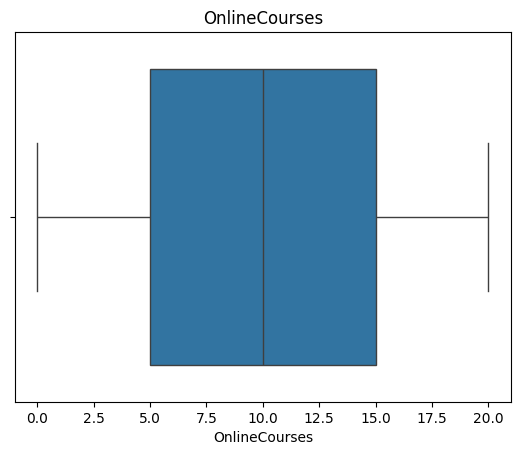

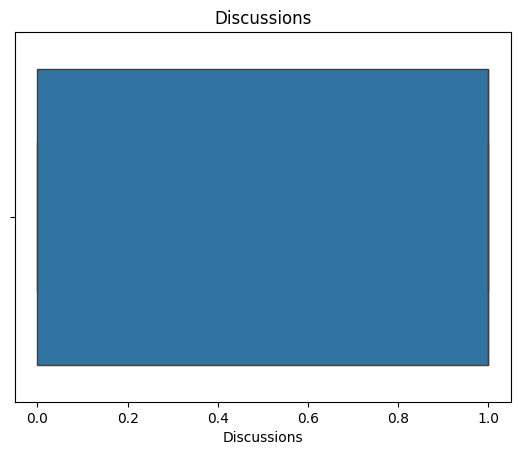

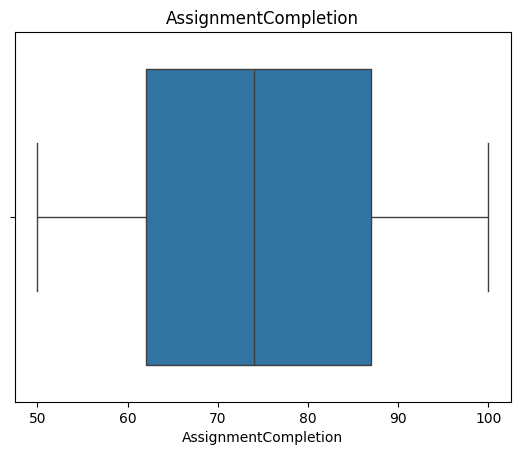

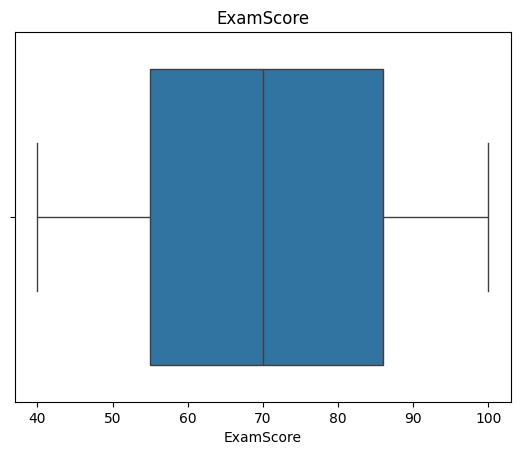

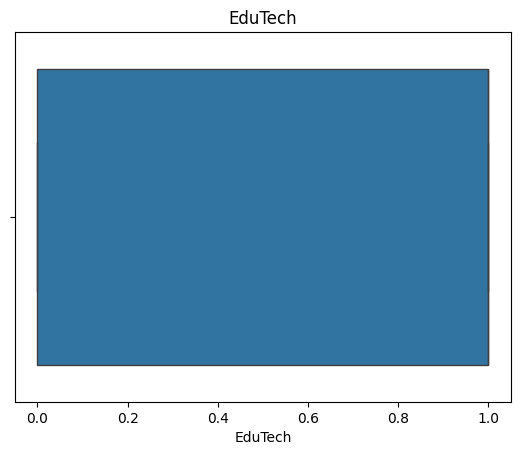

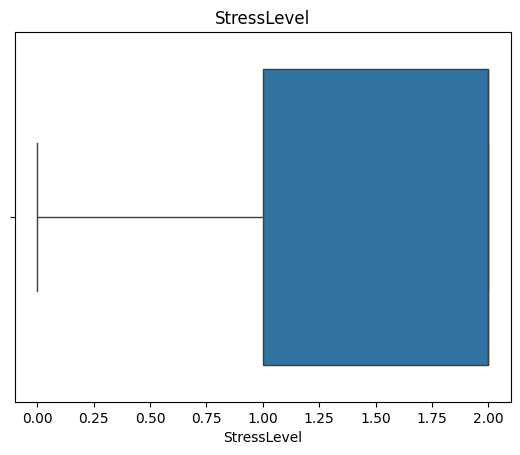

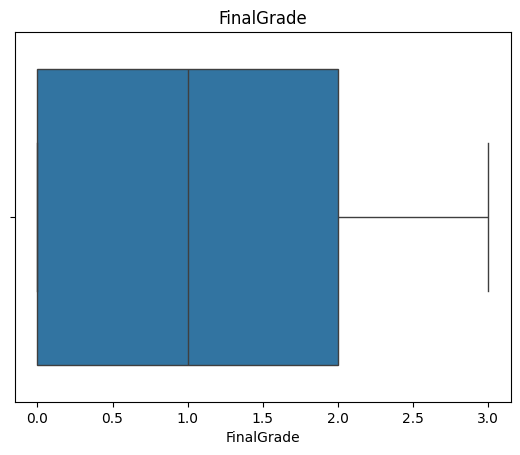

In [25]:
for col in students.columns:
    plt.title(col)
    sns.boxplot(data = students , x = col )
    plt.show()

<Axes: xlabel='StudyHours', ylabel='FinalGrade'>

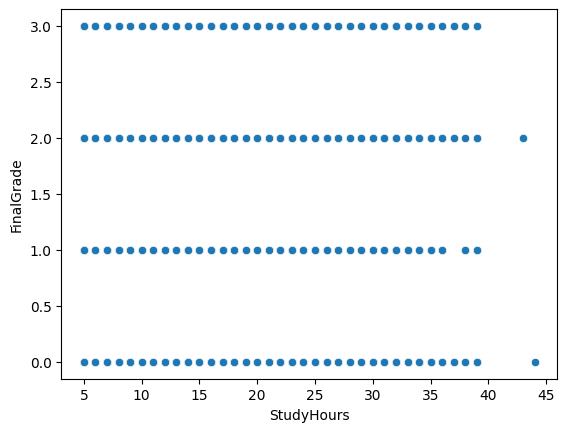

In [26]:
sns.scatterplot(data = students , x = "StudyHours" , y = "FinalGrade")

In [29]:
students.to_csv("C:\\Users\\BEST LAPTOP\\Desktop\\ML_Projects\\Student Alert End to End Project\\Datasets\\students.csv" , index = False)